In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import matthews_corrcoef, accuracy_score
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
# load files from ../results
import os
import pandas as pd

files = os.listdir("../results")

for file in files:
    if "AmpHGT" in file and file.endswith(".csv"):
        df = pd.read_csv(os.path.join("../results", file))
    
        # calculate auroc and auprc for each dataframe
        y_true = df['true_label']
        y_scores = df['predicted_label']
        auroc = roc_auc_score(y_true, y_scores)
        auprc = average_precision_score(y_true, y_scores)

        # do mcc and accuracy at best threshold
        precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
        best_threshold = thresholds[np.argmax(f1_scores[:-1])]
        y_pred = (y_scores >= best_threshold).astype(int)
        mcc = matthews_corrcoef(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        print(f"File: {file}, AUROC: {auroc}, AUPRC: {auprc}, F1: {f1_scores.max()}, MCC: {mcc}, Accuracy: {accuracy}")

        # # plot precision-recall curve and scatter plot of true vs predicted
        # plt.figure()
        # plt.plot(recall, precision, label='Precision-Recall curve')
        # plt.xlabel('Recall')
        # plt.ylabel('Precision')
        # plt.title(f'Precision-Recall Curve for {file}')
        # plt.legend()
        # plt.show()

        plt.figure()
        plt.scatter(y_true, y_scores, alpha=0.5)
        plt.xlabel('True Labels')
        plt.ylabel('Predicted Scores')
        plt.title(f'True vs Predicted for {file}')
        plt.show()

        # # plot auroc curve
        # from sklearn.metrics import roc_curve
        # fpr, tpr, _ = roc_curve(y_true, y_scores)
        # plt.figure()
        # plt.plot(fpr, tpr, label='ROC curve')
        # plt.xlabel('False Positive Rate')
        # plt.ylabel('True Positive Rate')
        # plt.title(f'ROC Curve for {file}')
        # plt.legend()
        # plt.show()


File: AmpHGT_PeptideMTR_sm_results.csv, AUROC: 0.9518522698118413, AUPRC: 0.9504518401092039, F1: 0.9014653816010019, MCC: 0.7882246620763314, Accuracy: 0.8863636363636364
File: AmpHGT_PeptideMLM-MTR_sm_results.csv, AUROC: 0.9532282434008936, AUPRC: 0.9550366775974792, F1: 0.8895460030206723, MCC: 0.7585701123880734, Accuracy: 0.8766511266511267
File: AmpHGT_PeptideMLM_base_results.csv, AUROC: 0.9588430204133004, AUPRC: 0.9592808597415247, F1: 0.896918167167399, MCC: 0.7761577133192076, Accuracy: 0.8869463869463869
File: AmpHGT_PeptideMTR_base_results.csv, AUROC: 0.9795337543142882, AUPRC: 0.981262030651403, F1: 0.9270290344639563, MCC: 0.8474469518517155, Accuracy: 0.9238539238539238
File: AmpHGT_PeptideMLM_sm_results.csv, AUROC: 0.9537029361364306, AUPRC: 0.9517307753065625, F1: 0.9079475932701915, MCC: 0.8003711399871771, Accuracy: 0.8976301476301476
File: AmpHGT_PeptideMLM-MTR_base_results.csv, AUROC: 0.9728484226526157, AUPRC: 0.975671620541346, F1: 0.9124201021231868, MCC: 0.8110

File: CellPPD_PeptideMLM-MTR_sm_results.csv, AUROC: 0.967264, AUPRC: 0.9684268852515066, F1: 0.9184491928609984, MCC: 0.8373452423281332, Accuracy: 0.9186666666666666


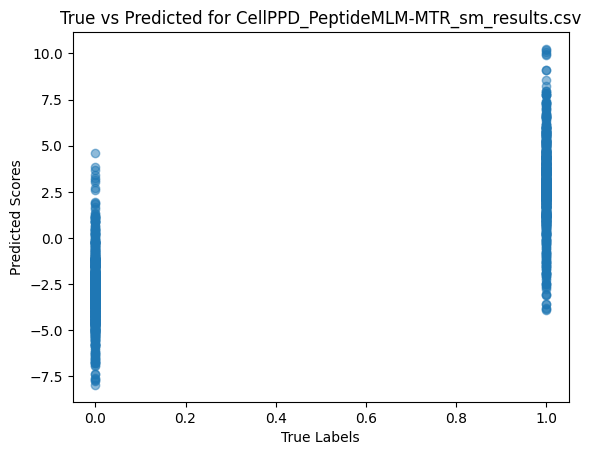

In [15]:
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import matthews_corrcoef, accuracy_score
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
# load files from ../results
import os
import pandas as pd



files = os.listdir("../results")

for file in files:
    if "CellPPD" in file and file.endswith(".csv"):
        df = pd.read_csv(os.path.join("../results", file))
    
        # calculate auroc and auprc for each dataframe
        y_true = df['true_label']
        y_scores = df['predicted_label']
        auroc = roc_auc_score(y_true, y_scores)
        auprc = average_precision_score(y_true, y_scores)

        # do mcc and accuracy at best threshold
        precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
        best_threshold = thresholds[np.argmax(f1_scores[:-1])]
        y_pred = (y_scores >= best_threshold).astype(int)
        mcc = matthews_corrcoef(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        print(f"File: {file}, AUROC: {auroc}, AUPRC: {auprc}, F1: {f1_scores.max()}, MCC: {mcc}, Accuracy: {accuracy}")

        # # plot precision-recall curve and scatter plot of true vs predicted
        # import matplotlib.pyplot as plt
        # plt.figure()
        # plt.plot(recall, precision, label='Precision-Recall curve')
        # plt.xlabel('Recall')
        # plt.ylabel('Precision')
        # plt.title(f'Precision-Recall Curve for {file}')
        # plt.legend()
        # plt.show()

        plt.figure()
        plt.scatter(y_true, y_scores, alpha=0.5)
        plt.xlabel('True Labels')
        plt.ylabel('Predicted Scores')
        plt.title(f'True vs Predicted for {file}')
        plt.show()

        # # plot auroc curve
        # from sklearn.metrics import roc_curve
        # fpr, tpr, _ = roc_curve(y_true, y_scores)
        # plt.figure()
        # plt.plot(fpr, tpr, label='ROC curve')
        # plt.xlabel('False Positive Rate')
        # plt.ylabel('True Positive Rate')
        # plt.title(f'ROC Curve for {file}')
        # plt.legend()
        # plt.show()
